# Ensemble Methods

### Ensemble methods use multiple algorithms in order to get better predictive or classification performance.

# Random Forest

In a random forest for classification, large numbers of decision trees work as an ensemble.  Each decision tree ultimately gives a class prediction, which is called a "vote."  The new data is assigned to the class with the most votes.



![title](./images/RF_01.JPG)

There could be a major problem, right?  If you give 25 different decision trees (DTs) the same data, shouldn't their classifications be basically the same and highly correlated?  How do you avoid this? There are 2 ways.

First, random forests use a technique called Bagging (Bootstrap Aggregation).  With bagging, each individual decision tree (DT) is able to randomly sample, with replacement, from the dataset.  This ensures that each (DT) has slightly different data, although from the same set, with which to build the tree and make the predicition.  If bagging was not used, all the DTs would be highly correlated.

Second, random forests use Feature Randomness.  Rather than using all the available features to determine each split like a standard DT, each tree instead has a random subset of features.

![title](./images/RF_02.JPG)

### Let's use a Random Forest Classifier to make classifications on our Iris data

In [1]:
# Imports
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split


### Import the Iris dataset

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()

# Print the class names 
print("The class names are:")
print(iris.target_names)

# Print the feature names
print("\nThe feature names are:")
print(iris.feature_names)
print("\n")

# X will be all 4 features
X = iris.data[:, :4]
# y is the type of flower
y = iris.target


The class names are:
['setosa' 'versicolor' 'virginica']

The feature names are:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']




### Plot the Iris data.  The data is labeled.  Each color in the scatterplot represents a different class.

Text(0.5, 1.0, 'Sepal Length vs Sepal Width per Category')

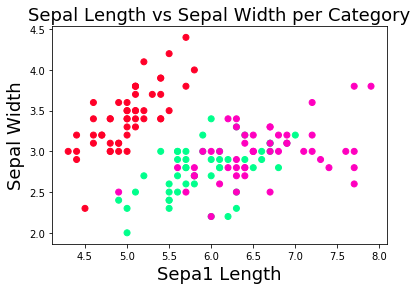

In [3]:
# Plot the data

plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepa1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)
plt.title('Sepal Length vs Sepal Width per Category', fontsize=18)



### Create a model to classify new flowers

In [4]:
# Create train/test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the Random Forest classifier
# n_estimators is number of trees to be used in the forest
clf=RandomForestClassifier(n_estimators=100)

# Train the model 
clf.fit(X_train,y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### See how well our classification model performs.

In [5]:
# Predict
y_pred=clf.predict(X_test)

# Print the accuracy
print("Test set accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))



Test set accuracy: 0.97


### Test the new model by making a prediction based on unseen data

In [6]:
# Create a new sample and use the model built above to predict the species
x_new = np.array([[5, 3.6, 1.3, 0.1]])

# Predict the class for this new sample
prediction = clf.predict(x_new)
print("The predicted class for this sample is " + str(iris['target_names'][prediction][0]) + ".")
print("The correct class is setosa.")



The predicted class for this sample is setosa.
The correct class is setosa.


### Get the importance of each feature to the model.  Features with low importance can potentially be removed from the model for subsequent training.

In [7]:
# Put the feature names and their importance values into a dataframe
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)

# Print the importance
print("The importance of the features is:")
print(feature_imp)

The importance of the features is:
petal width (cm)     0.466033
petal length (cm)    0.392307
sepal length (cm)    0.111262
sepal width (cm)     0.030398
dtype: float64


### Create plot of the feature importance

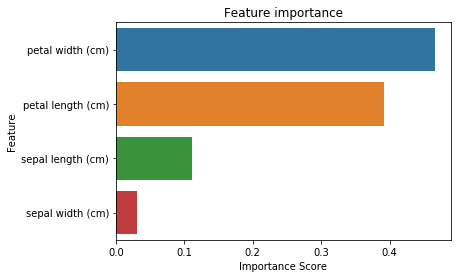

In [8]:
# Creat a bar plot of the feature importance
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature importance")
plt.show()

# Use Random Forest Regression to Predict Prices for Houses in Memphis in the 38118 Zip Code using the same dataset that was used for Multivariable Linear Regression. 


In [9]:
# Define the columns to be used for regression and import the dataset into a dataframe
cols=["SF","Price","Beds","Baths","Year_Built","Lot_Size_Acres","Garage_Size","Stories","Brick"]
RFR_df = pd.read_csv('data/Linear_Regression_Memphis.csv', names=cols)

# Scale SF to SF_acres
RFR_df["SF_Acres"] = (RFR_df["SF"] / 43560)

print(RFR_df.head(5))

     SF  Price  Beds  Baths  Year_Built  Lot_Size_Acres  Garage_Size  Stories  \
0   855  55667     2    1.0        1955            0.17            0        1   
1   985  72576     3    1.0        1967            0.17            0        1   
2   988  54000     3    1.0        1973            0.14            0        1   
3  1000  80000     3    1.0        1958            0.18            0        1   
4  1001  65500     3    1.0        1959            0.24            0        1   

   Brick  SF_Acres  
0      1  0.019628  
1      1  0.022612  
2      1  0.022681  
3      2  0.022957  
4      2  0.022980  


### Let's create a model to predict house prices.
* We will do this using Random Forest Regression and the model will take all features into account.
* We will divide our data up into 2 groups - the training group and testing group. 80% will be in training, 20% in testing.

In [10]:
# Create 2 subsets of data.  One with attributes we will use for regression (X), and 
# one for the values we are trying to predict - house prices (y)

RFR_X = RFR_df[["SF_Acres", "Beds","Baths","Year_Built","Lot_Size_Acres","Garage_Size","Stories","Brick"]]
RFR_y = RFR_df["Price"]


# Create train/test splits
RFR_X_train, RFR_X_test, RFR_y_train, RFR_y_test = train_test_split(RFR_X, RFR_y, test_size=0.2, random_state=0)

# Create the regressor and train the model
regressor = RandomForestRegressor(n_estimators=25, random_state=0)  
regressor.fit(RFR_X_train, RFR_y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

### Make predictions based on the model we just created and see how well it performs

In [11]:
# Make predictions
RFR_y_pred = regressor.predict(RFR_X_test)

RFR_Actual_Predicted_df = pd.DataFrame({'Predicted': RFR_y_pred, 'Actual': RFR_y_test})

# Print the predictions vs actual values
print("Predictions:")
for i in range(0,len(RFR_y_pred)-1):
    print("SF = {:,d}, Prediction = {:,d}, Actual = {:,d}, Difference =  {:,d}".format(int(RFR_X_test.iloc[i][0]),
                                                                                       int(RFR_Actual_Predicted_df.iloc[i][1]),
                                                                                       int(RFR_Actual_Predicted_df.iloc[i][0]),
                                                                                       int(RFR_Actual_Predicted_df.iloc[i][1] - int(RFR_Actual_Predicted_df.iloc[i][0]))))
    i = i + 1



Predictions:
SF = 0, Prediction = 54,892, Actual = 54,000, Difference =  892
SF = 0, Prediction = 72,316, Actual = 73,000, Difference =  -683
SF = 0, Prediction = 105,435, Actual = 89,000, Difference =  16,435
SF = 0, Prediction = 94,599, Actual = 77,230, Difference =  17,369
SF = 0, Prediction = 87,121, Actual = 85,639, Difference =  1,482
SF = 0, Prediction = 87,011, Actual = 83,943, Difference =  3,068
SF = 0, Prediction = 89,911, Actual = 125,000, Difference =  -35,088
SF = 0, Prediction = 98,692, Actual = 139,900, Difference =  -41,207
SF = 0, Prediction = 106,243, Actual = 111,900, Difference =  -5,656
SF = 0, Prediction = 64,179, Actual = 55,000, Difference =  9,179
SF = 0, Prediction = 73,604, Actual = 89,900, Difference =  -16,295
SF = 0, Prediction = 76,127, Actual = 80,000, Difference =  -3,872
SF = 0, Prediction = 84,569, Actual = 64,000, Difference =  20,569
SF = 0, Prediction = 68,593, Actual = 67,019, Difference =  1,574
SF = 0, Prediction = 70,261, Actual = 68,213, Diff

### Use the Root Mean Square Error metric to evaluate how well our model performed

In [12]:
# Use RMSE metric
RFR_RMSE = np.sqrt(sklearn.metrics.mean_squared_error(RFR_y_test, RFR_y_pred))
print('\nRoot Mean Squared Error: {:.2f}'.format(RFR_RMSE))


Root Mean Squared Error: 16407.02


# Comparisons of Simple Linear Regression versus Multiple Variable Linear Regression

### Compare RMSE

In [13]:
# Show RMSE for Multi Variable Linear Regression and Random Forest Regression
# RMSE for Multi Variable Linear Regression was determined in the Regression notebook

print(("RMSE for Multi Variable Linear Regression = 16,724.72\nRMSE for Random Forest Regression = {:.2f}").format(RFR_RMSE))

RMSE for Multi Variable Linear Regression = 16,724.72
RMSE for Random Forest Regression = 16407.02


### Get the importance of each feature to the model.  Features with low importance can potentially be removed from the model for subsequent training.

In [14]:
# Put the feature names and their importance values into a dataframe
feature_imp = pd.Series(regressor.feature_importances_,index=RFR_X.columns).sort_values(ascending=False)

# Print the importance
print("The importance of the features is:")
print(feature_imp)

The importance of the features is:
SF_Acres          0.559789
Lot_Size_Acres    0.199027
Year_Built        0.104010
Baths             0.062168
Stories           0.035083
Beds              0.021125
Garage_Size       0.013331
Brick             0.005467
dtype: float64


### Create plot of the feature importance

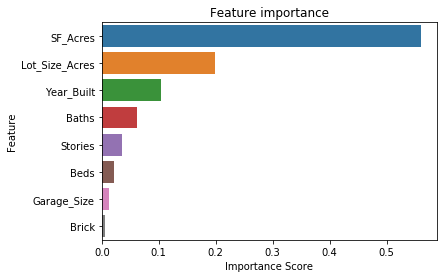

In [15]:
# Create a bar plot of the feature importance
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature importance")
plt.show()

Credits
* https://www.kaggle.com/tcvieira/simple-random-forest-iris-dataset
* https://towardsdatascience.com/understanding-random-forest-58381e0602d2
* https://www.kaggle.com/tcvieira/simple-random-forest-iris-dataset

